https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html
    
http://nimfa.biolab.si/nimfa.models.nmf.html
    
https://people.revoledu.com/kardi/tutorial/Clustering/Cophenetic.htm

https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy

In [1]:
import pandas as pd
import numpy as np

import geopandas as gpd

import matplotlib.pyplot as plt

# 读取数据

In [2]:
result = pd.read_csv('./data/OD/od_select14.csv')

In [3]:
result.head(1)

,index,TownName_x,TownName_y,BIKE_ID,DATA_TIME,LOCK_STATUS,LONGITUDE,LATITUDE,BIKE_ID_D,DATA_TIME_D,LOCK_STATUS_D,LONGITUDE_D,LATITUDE_D
0,0,豫园街道,豫园街道,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:35:02,0,121.489062,31.228411,713ED78F8DC23233E0533C0BA8C09291,2018-08-26 08:40:15,1.0,121.483061,31.230273


In [4]:
len(result)

20983905

# 创建矩阵

In [5]:
matrix = result.pivot_table(index='BIKE_ID',columns='TownName_y',values='DATA_TIME',aggfunc='count')

In [6]:
matrix.head()

TownName_y,七宝镇,三林镇,上钢新村街道,东明路街道,临汾路街道,五角场街道,五角场镇,五里桥街道,仙霞新村街道,共和新路街道,...,长白新村街道,长风新村街道,陆家嘴街道,静安寺街道,顾村镇,高东镇,高境镇,高桥镇,高行镇,龙华街道
BIKE_ID,,,,,,,,,,,,,,,,,,,,,
713ED78F8DC23233E0533C0BA8C09291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
713ED78F8DC33233E0533C0BA8C09291,1.0,NaN,1.0,NaN,NaN,NaN,1.0,8.0,NaN,NaN,...,1.0,1.0,2.0,7.0,NaN,NaN,NaN,NaN,NaN,1.0
713ED78F8DC43233E0533C0BA8C09291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,...,NaN,5.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
713ED78F8DC53233E0533C0BA8C09291,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN,...,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
713ED78F8DC83233E0533C0BA8C09291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
matrix = matrix.fillna(0)

In [8]:
matrix

TownName_y,七宝镇,三林镇,上钢新村街道,东明路街道,临汾路街道,五角场街道,五角场镇,五里桥街道,仙霞新村街道,共和新路街道,...,长白新村街道,长风新村街道,陆家嘴街道,静安寺街道,顾村镇,高东镇,高境镇,高桥镇,高行镇,龙华街道
BIKE_ID,,,,,,,,,,,,,,,,,,,,,
713ED78F8DC23233E0533C0BA8C09291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
713ED78F8DC33233E0533C0BA8C09291,1.0,0.0,1.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,...,1.0,1.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0,1.0
713ED78F8DC43233E0533C0BA8C09291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,...,0.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
713ED78F8DC53233E0533C0BA8C09291,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,...,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
713ED78F8DC83233E0533C0BA8C09291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751D1DC50A522B84E0533C0BA8C047F8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9.0
751D1DC50A572B84E0533C0BA8C047F8,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
751D1DC50A5B2B84E0533C0BA8C047F8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
X = matrix.values

In [10]:
X.shape

(358175, 117)

# 执行NMF-nimfa

In [11]:
! pip install nimfa

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/


In [12]:
import nimfa

nmf = nimfa.Nmf(X, seed="nndsvd", rank=2, max_iter=50, update='euclidean',
                objective='fro')
nmf_fit = nmf()

In [13]:
nmf_fit.fit.basis().shape

(358175, 2)

In [14]:
nmf_fit.fit.coef().shape

(2, 117)

In [15]:
nmf_fit.fit.coph_cor()

1.0

In [16]:
H = nmf_fit.fit.coef()

In [17]:
H

matrix([[1.28769656e+01, 6.82730771e-02, 7.57018328e-02, 2.32181391e-02,
         1.18973577e+00, 2.03045017e+01, 8.81166276e+00, 5.58600404e+00,
         4.67571648e+00, 5.12912052e+00, 3.75583374e+00, 4.01382261e+00,
         1.79397591e+00, 3.51204896e+00, 2.88385238e-05, 5.54681461e+00,
         8.20814913e-01, 6.63967134e+00, 6.63738511e+00, 4.86540762e+00,
         2.79407931e-02, 5.83196588e+00, 3.87296126e-01, 3.31317972e+00,
         6.53145828e-02, 1.87568366e-01, 6.94649391e+00, 7.28473569e+00,
         1.19341515e+01, 1.04312225e-02, 6.57412065e+00, 3.31185801e-02,
         1.56634769e+01, 9.06006478e+00, 6.61925827e+00, 5.23783897e+00,
         5.56554389e+00, 3.70685417e+00, 5.48999697e+00, 4.12848848e+00,
         4.52853896e-01, 4.34767712e+00, 4.72476210e+00, 3.86329959e+00,
         6.49137180e+00, 1.68942161e+00, 5.84306822e+00, 1.93709274e-08,
         3.48873482e+00, 2.17698861e+00, 4.56565241e-04, 2.52999998e+00,
         9.37546842e+00, 1.36118508e+01, 5.28661340

In [18]:
dx = pd.DataFrame(H.T)

In [19]:
dx.head()

,0,1
0,12.876966,2.220446e-16
1,0.068273,9.439813e+00
2,0.075702,5.605370e+00
3,0.023218,2.424589e+00
4,1.189736,2.648724e-12


In [20]:
dx['region'] = dx.apply(lambda x:np.argmax(x),axis=1)

In [21]:
dx.head()

,0,1,region
0,12.876966,2.220446e-16,0
1,0.068273,9.439813e+00,1
2,0.075702,5.605370e+00,1
3,0.023218,2.424589e+00,1
4,1.189736,2.648724e-12,0


In [22]:
names = matrix.T.reset_index()['TownName_y']

In [23]:
df_use = pd.concat([dx,names],axis=1)[['region','TownName_y']]

In [24]:
df_use.head()

,region,TownName_y
0,0,七宝镇
1,1,三林镇
2,1,上钢新村街道
3,1,东明路街道
4,0,临汾路街道


# 空间可视化

In [25]:
region = gpd.read_file('./data/shpData/basic_shp/shanghai_select_town_wgs84.shp')

In [26]:
region.head()

,TownName,geometry
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339..."
1,顾村镇,"POLYGON ((121.43427 31.34768, 121.43350 31.347..."
2,高境镇,"POLYGON ((121.49447 31.33941, 121.49103 31.334..."
3,张庙街道,"POLYGON ((121.45938 31.32963, 121.45780 31.329..."
4,杨行镇,"POLYGON ((121.47079 31.39551, 121.47110 31.395..."


In [27]:
df = region.merge(df_use,left_on='TownName',right_on='TownName_y')

In [28]:
df.head()

,TownName,geometry,region,TownName_y
0,大场镇,"POLYGON ((121.40022 31.34036, 121.40017 31.339...",0,大场镇
1,顾村镇,"POLYGON ((121.43427 31.34768, 121.43350 31.347...",0,顾村镇
2,高境镇,"POLYGON ((121.49447 31.33941, 121.49103 31.334...",0,高境镇
3,张庙街道,"POLYGON ((121.45938 31.32963, 121.45780 31.329...",0,张庙街道
4,杨行镇,"POLYGON ((121.47079 31.39551, 121.47110 31.395...",0,杨行镇


<AxesSubplot:>

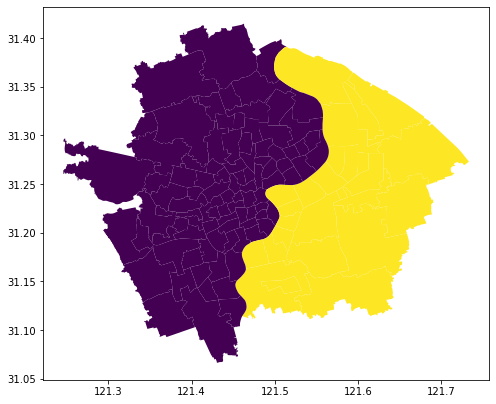

In [29]:
fig,ax = plt.subplots(figsize=(8,8))

df.plot(ax=ax,column='region')

# 执行NMF-sklearn

In [30]:
from sklearn.decomposition import NMF
model = NMF(n_components=6, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_

In [31]:
W.shape

(358175, 6)

In [32]:
H.shape

(6, 117)

In [33]:
def com(n):
    model = NMF(n_components=n, init='random', random_state=0)
    W = model.fit_transform(X)
    H = model.components_
    dx = pd.DataFrame(H.T)
    dx['region'] = dx.apply(lambda x:np.argmax(x),axis=1)
    names = matrix.T.reset_index()['TownName_y']
    df_use = pd.concat([dx,names],axis=1)[['region','TownName_y']]
    region = gpd.read_file('./data/shpData/basic_shp/shanghai_select_town_wgs84.shp')
    df = region.merge(df_use,left_on='TownName',right_on='TownName_y')
    if n == 6:
        df.to_file('./data/shpData/middle_shp/cluster6y.shp',encoding='utf-8')
    return df

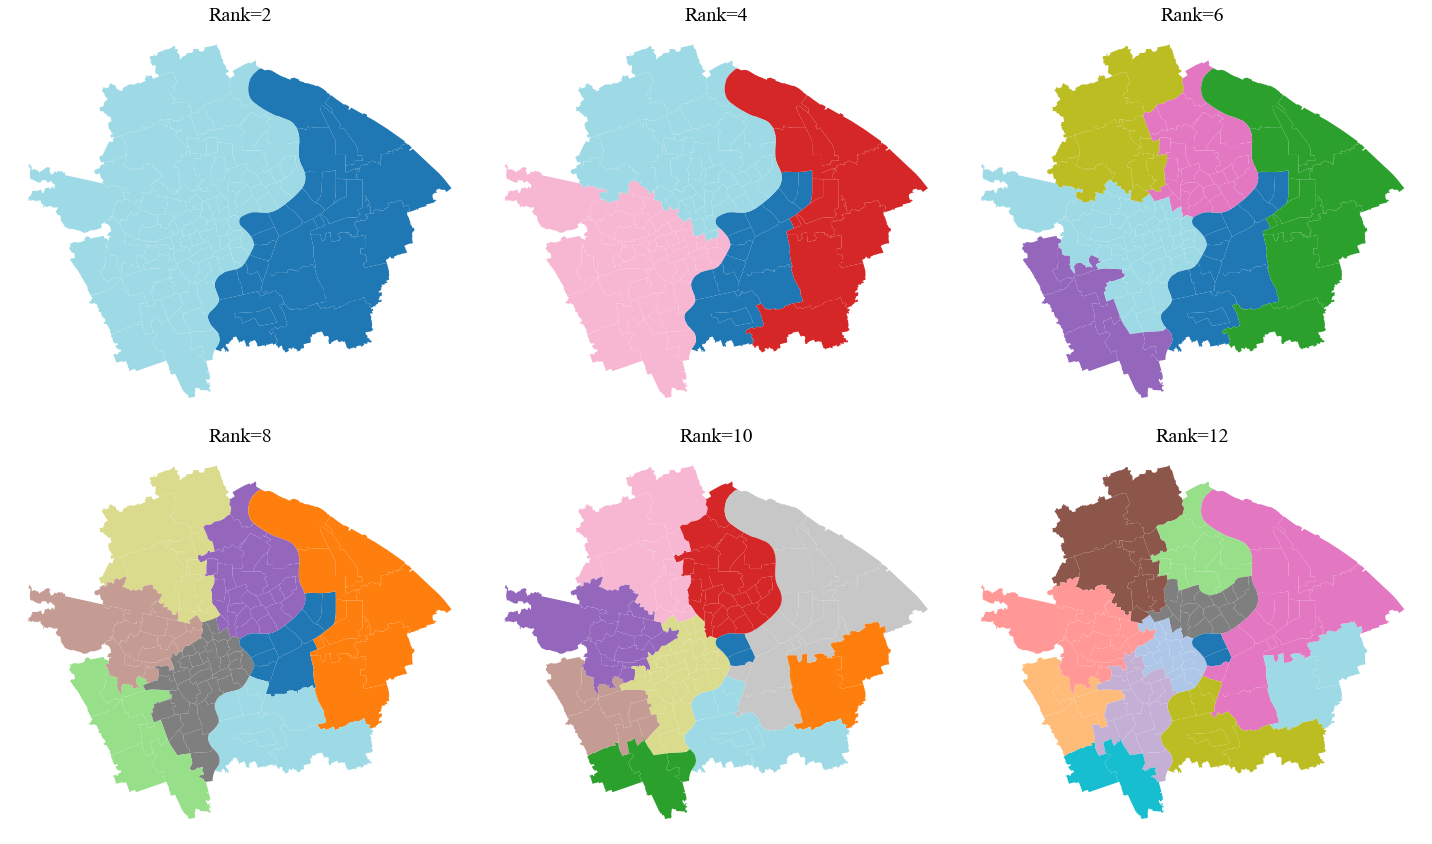

In [34]:
fig,ax = plt.subplots(2,3,figsize=(20,12))

n = 1
for i in range(2):
    for j in range(3):
        df = com(n*2)
        df.plot(ax=ax[i,j],column='region',cmap='tab20')
        ax[i,j].set_title(f'Rank={n*2}',fontsize=20,fontfamily='Times New Roman')
        ax[i,j].axis('off')
        n = n + 1
plt.tight_layout()